In [4]:
##importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
##input parameters
porosity = float(input("Enter Porosity: "))
K = float(input("Enter Perm.(md): "))
h = float(input("Enter pay zone thicknes(Feet): "))
P = float(input("Enter  Reservoir Pressure(psi): "))
Pb = float(input("Enter Bubble Point Pressure(psi): "))
Bo = float(input("Enter Formation Volume Factor: "))
Viscosity  = float(input("Enter fluid viscosity(cp): "))
ct = float(input("Enter Total Compressibility(psi-1): "))
A = float(input("Enter Drainage Area(Acres): "))
re = np.sqrt(43560*A/3.14)
rw = float(input("Enter Wellbore radius(ft): "))
S = float(input("Enter Skin Factor: "))

Enter Porosity: 0.19
Enter Perm.(md): 8.2
Enter pay zone thicknes(Feet): 53
Enter  Reservoir Pressure(psi): 5651
Enter Bubble Point Pressure(psi): 5651
Enter Formation Volume Factor: 1.1
Enter fluid viscosity(cp): 1.7
Enter Total Compressibility(psi-1): 0.0000129
Enter Drainage Area(Acres): 640
Enter Wellbore radius(ft): 0.328
Enter Skin Factor: 0


The value of productivity index is 0.19678102247296522
The value of Absolute open flow is  617.783087774848 stb/day
      Pressures  flowrates_vogel
0          5651         0.000000
1          5495        30.321201
2          5490        31.280576
3          5485        32.239177
4          5480        33.197004
...         ...              ...
1096         20       617.339606
1097         15       617.451637
1098         10       617.562895
1099          5       617.673378
1100          0       617.783088

[1101 rows x 2 columns]


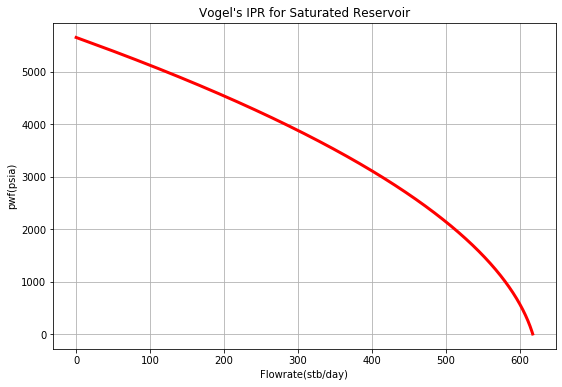

In [6]:
##Calculation of productivity index
J = K*h/(141.2*Bo*Viscosity*(np.log(re/rw)-0.75+S))
print("The value of productivity index is", J)
##Calculation of Absolute open flow
qmax = J*P/1.8
print("The value of Absolute open flow is ", qmax, "stb/day")
##Pressures array
a = np.arange(0,5500,5)
b = np.append(a,5651)
pwf = b[-1::-1]
##Calculation of flowrate
flowrate = []
for i in pwf:
    q = qmax*(1-0.2*(i/P)-0.8*((i/P)**2))
    flowrate.append(q)
flowrates = np.array(flowrate)
df = pd.DataFrame()
df["Pressures"] = pwf
df["flowrates_vogel"] =flowrates
##plotting IPR
plt.figure(figsize = (9,6))
plt.plot(flowrates,pwf,c = "red",linewidth=3)
plt.xlabel("Flowrate(stb/day)")
plt.ylabel("pwf(psia)")
plt.grid(True)
plt.title("Vogel's IPR for Saturated Reservoir")
print(df)

In [7]:
df

,Pressures,flowrates_vogel
0,5651,0.000000
1,5495,30.321201
2,5490,31.280576
3,5485,32.239177
4,5480,33.197004
...,...,...
1096,20,617.339606
1097,15,617.451637
1098,10,617.562895
1099,5,617.673378


In [8]:
df["P2"] = df["Pressures"]**2

In [9]:
x = np.array(df[['Pressures',"P2"]])

In [23]:
y = np.array(df["flowrates_vogel"]).reshape(1101,1)

In [24]:
x

array([[    5651, 31933801],
       [    5495, 30195025],
       [    5490, 30140100],
       ...,
       [      10,      100],
       [       5,       25],
       [       0,        0]])

In [25]:
x.shape

(1101, 2)

In [26]:
y.shape

(1101, 1)

In [12]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                   random_state = 0,test_size=0.50)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
#print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print(linreg.intercept_)
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [[-2.18645581e-02 -1.54765939e-05]]
[617.78308777]
R-squared score (training): 1.000
R-squared score (test): 1.000


In [36]:
X_train.shape

(550, 2)

In [37]:
X_test.shape

(551, 2)

In [38]:
Y_reg = np.dot(x,linreg.coef_.T)+linreg.intercept_

In [39]:
Y_reg

array([[  0.        ],
       [ 30.32120112],
       [ 31.28057583],
       ...,
       [617.56289453],
       [617.67337807],
       [617.78308777]])

Text(0.5, 1.0, "Vogel's IPR for Saturated Reservoir Regression")

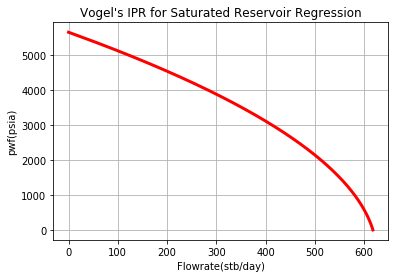

In [41]:
plt.plot(Y_reg,pwf,c = "red",linewidth=3)
plt.xlabel("Flowrate(stb/day)")
plt.ylabel("pwf(psia)")
plt.grid(True)
plt.title("Vogel's IPR for Saturated Reservoir Regression")


      Pressures  flowrates_vogel        P2
0          5651         0.000000  31933801
1          5495        30.321201  30195025
2          5490        31.280576  30140100
3          5485        32.239177  30085225
4          5480        33.197004  30030400
...         ...              ...       ...
1096         20       617.339606       400
1097         15       617.451637       225
1098         10       617.562895       100
1099          5       617.673378        25
1100          0       617.783088         0

[1101 rows x 3 columns]


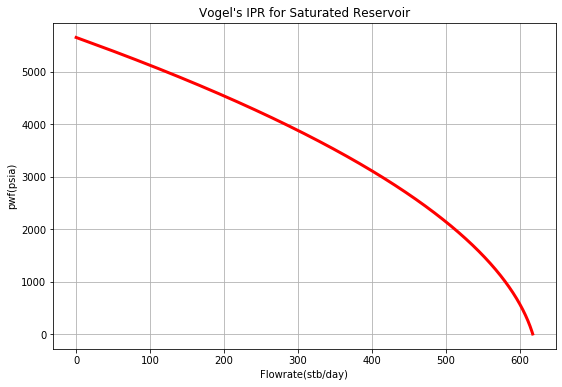

In [42]:
plt.figure(figsize = (9,6))
plt.plot(flowrates,pwf,c = "red",linewidth=3)
plt.xlabel("Flowrate(stb/day)")
plt.ylabel("pwf(psia)")
plt.grid(True)
plt.title("Vogel's IPR for Saturated Reservoir")
print(df)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))



[[-2.18645581e-02 -1.54765939e-05]]
[617.78308777]
1.0
1.0

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

[[-2.18645581e-02 -1.54765939e-05]]
[617.78308777]
1.0
1.0
